In [1]:
from fastai.vision import *
from fastai.metrics import error_rate
import os

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [20]:
bs = 64

In [4]:
path = Path.home() / 'data/chest_xray'
path.ls()

[PosixPath('/home/ilyarudyak/data/chest_xray/train'),
 PosixPath('/home/ilyarudyak/data/chest_xray/val'),
 PosixPath('/home/ilyarudyak/data/chest_xray/test')]

In [5]:
img = open_image(path/'val'/'NORMAL'/'NORMAL2-IM-1440-0001.jpeg')

In [6]:
img.data.shape

torch.Size([3, 1225, 1632])

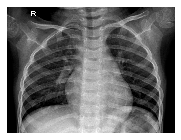

In [7]:
img.show()

In [8]:
tfms = get_transforms()

In [21]:
np.random.seed(7)
data = ImageDataBunch.from_folder(path, 
                                  valid='val',
                                  test='test',
                                  size=256, 
                                  bs=bs,
                                  ds_tfms=tfms).normalize(imagenet_stats)

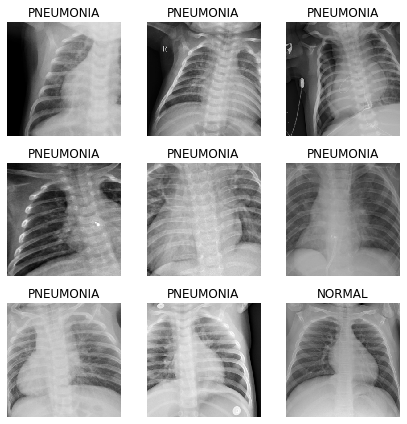

In [22]:
data.show_batch(3, figsize=(6,6))

In [23]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds), len(data.test_ds)

(['NORMAL', 'PNEUMONIA'], 2, 4706, 526, 624)

In [24]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [25]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.429235,0.342365,0.085551,01:03
1,0.233777,0.259425,0.076046,01:02
2,0.148105,0.141293,0.047529,01:02
3,0.131029,0.111920,0.032319,01:03


In [26]:
learn.save('stage-1')

In [27]:
learn.unfreeze()

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


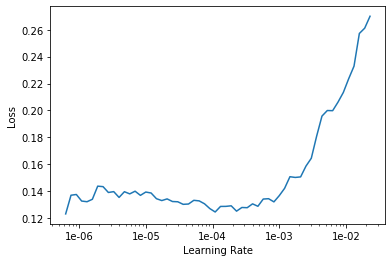

In [29]:
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(10, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.114106,0.094838,0.030418,01:11
1,0.102114,0.110490,0.036122,01:11
2,0.090809,0.086888,0.030418,01:11
3,0.082453,0.098552,0.034221,01:12
4,0.055874,0.061202,0.020913,01:11
5,0.047995,0.047348,0.013308,01:11
6,0.045877,0.117529,0.028517,01:12
7,0.040632,0.133729,0.036122,01:11
8,0.027151,0.077581,0.030418,01:11
9,0.020197,0.087062,0.030418,01:11


In [31]:
learn.save('stage-2')

In [36]:
interp = ClassificationInterpretation.from_learner(learn)

In [37]:
interp.confusion_matrix()

array([[138,   0],
       [ 16, 372]])

In [38]:
interp_test = ClassificationInterpretation.from_learner(learn, ds_type=DatasetType.Test)

In [39]:
interp_test.confusion_matrix()

array([[200, 424],
       [  0,   0]])